In [1]:
import pickle
import numpy as np
import pandas as pd
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

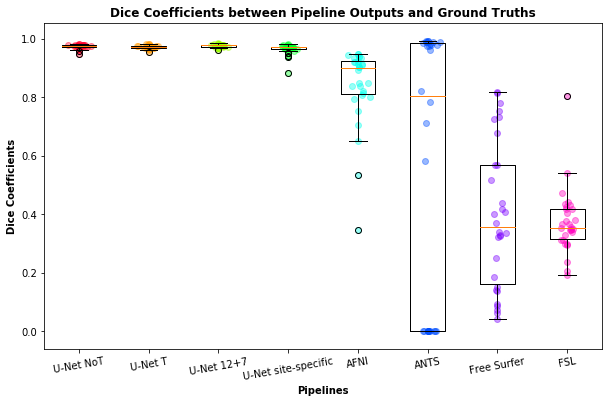

In [167]:
# Monkey Skullstripping

############
#   Dice   #
############

model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific','AFNI','ANTS','Free Surfer','FSL']
dice = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice.mat')
dice = dice['dice']

xs, ys = [], []

for i, m in enumerate(model):
    xs.append(np.concatenate((np.ones(5)*(i+1), np.random.normal(i+1, 0.06, 23), np.ones(2)*(i+1)), axis=0))
    d = dice[i,:].tolist()
    d.sort()
    ys.append(d)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Dice Coefficients between Pipeline Outputs and Ground Truths',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('Dice Coefficients',fontweight='bold')
ax.boxplot(np.transpose(dice), labels=model)
plt.xticks(rotation=10)

clevels = np.linspace(0., 1., len(model))
for x, y, clevel in zip(xs, ys, clevels):
    # ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.6, s=8)
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice.png')

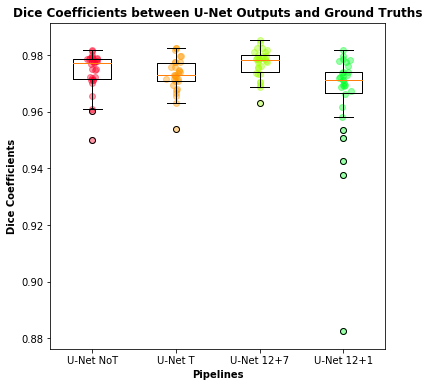

In [13]:
###################
#  Dice  Zoom-in  #
###################

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Dice Coefficients between U-Net Outputs and Ground Truths',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('Dice Coefficients',fontweight='bold')
ax.boxplot(np.transpose(dice[0:4,:]), labels=['U-Net NoT','U-Net T','U-Net 12+7','U-Net 12+1'])
# plt.xticks(rotation=20)

for x, y, clevel in zip(xs[0:4], ys[0:4], clevels[0:4]):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_unet.png')

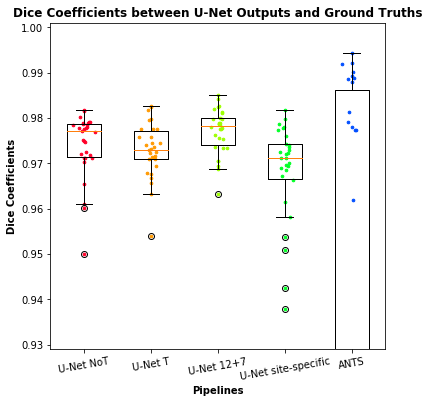

In [170]:
###################
#  Dice  Zoom-in  #
###################

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Dice Coefficients between U-Net Outputs and Ground Truths',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('Dice Coefficients',fontweight='bold')
ax.set_ylim(0.929,1.001)
ax.boxplot(np.transpose(np.vstack((dice[0:4,:],dice[5,:]))), labels=['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific','ANTS'])
plt.xticks(rotation=10)

xstack=np.vstack((xs[0:4],xs[4]))
ystack=np.vstack((ys[0:4],ys[5]))
cstack=np.hstack((clevels[0:4],clevels[5]))

for x, y, clevel in zip(xstack, ystack, cstack):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=1, s=7)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_unet_ants.png')

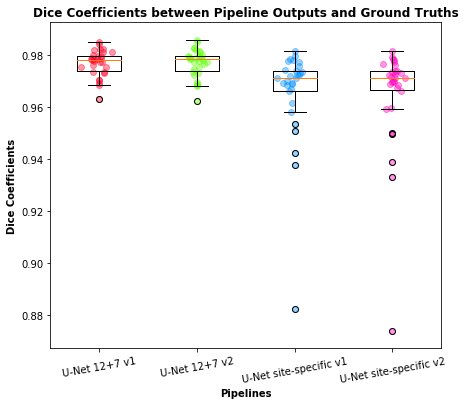

In [5]:
###########################################
#   Dice fill-hole algorithm comparison   #
###########################################

from matplotlib import cm

model = ['U-Net 12+7 v1','U-Net 12+7 v2','U-Net site-specific v1','U-Net site-specific v2']
dice = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/fillhole/dice_fillhole.mat')
dice = dice['dice']

xs, ys = [], []

for i, m in enumerate(model):
    xs.append(np.concatenate((np.ones(5)*(i+1), np.random.normal(i+1, 0.06, 23), np.ones(2)*(i+1)), axis=0))
    d = dice[i,:].tolist()
    d.sort()
    ys.append(d)

fig, ax = plt.subplots(figsize=(7,6))
ax.set_title('Dice Coefficients between Pipeline Outputs and Ground Truths',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('Dice Coefficients',fontweight='bold')
ax.boxplot(np.transpose(dice), labels=model)
plt.xticks(rotation=10)

clevels = np.linspace(0., 1., len(model))
for x, y, clevel in zip(xs, ys, clevels):
    # ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.6, s=8)
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/fillhole/dice.png',dpi=300)

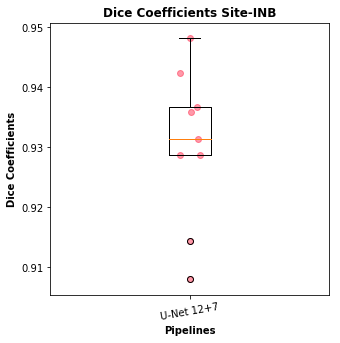

In [7]:
#####################
#   Mask from Pam   #
#####################

model = ['U-Net 12+7']
dice = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/pam_lisa/dice_pam_inb_unet127filled.mat')
dice = dice['dice']

xs, ys = [], []

for i, m in enumerate(model):
    xs.append(np.concatenate((np.ones(2)*(i+1), np.random.normal(i+1, 0.03, 6), np.ones(1)*(i+1)), axis=0))
    d = dice[i,:].tolist()
    d.sort()
    ys.append(d)

fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Dice Coefficients Site-INB',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('Dice Coefficients',fontweight='bold')
ax.boxplot(np.transpose(dice), labels=model)
plt.xticks(rotation=10)

clevels = np.linspace(0., 1., len(model))
for x, y, clevel in zip(xs, ys, clevels):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/pam_lisa/dice_inb.png')

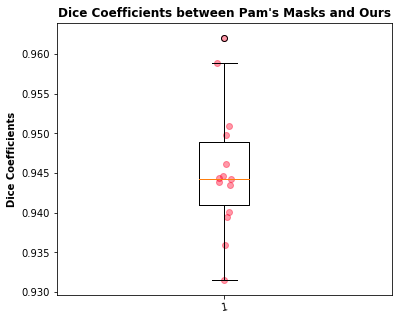

In [38]:
dice = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/pam_lisa/dice_pam16.mat')
dice = dice['dice'][0]

a = np.delete(dice,-1)
b = np.delete(a,-6)

xs, ys = [], []

xs.append(np.concatenate((np.ones(1)*(i+1), np.random.normal(i+1, 0.03, 12), np.ones(1)*(i+1)), axis=0))
d = b.tolist()
d.sort()
ys.append(d)

fig, ax = plt.subplots(figsize=(6,5))
ax.set_title("Dice Coefficients between Pam's Masks and Ours" ,fontweight='bold')
# ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('Dice Coefficients',fontweight='bold')
ax.boxplot(b)
plt.xticks(rotation=10)

clevels = np.linspace(0., 1., len(model))
for x, y, clevel in zip(xs, ys, clevels):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/pam_lisa/dice_gt.png')

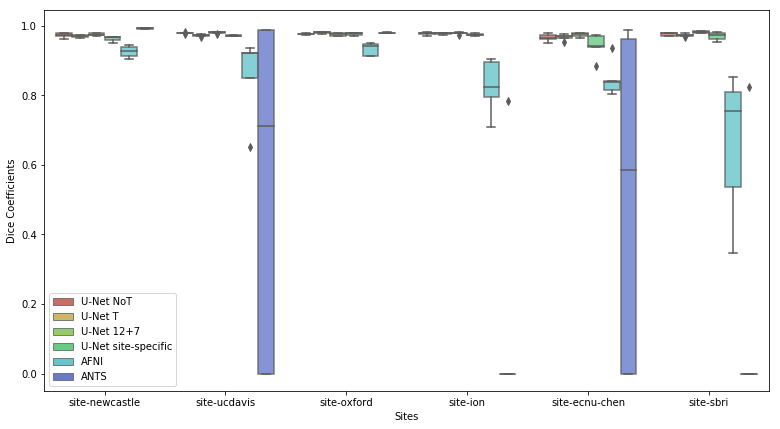

In [217]:
data = []
model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific','AFNI','ANTS']
site_list = ['site-newcastle', 'site-ucdavis', 'site-oxford', 'site-ion', 'site-ecnu-chen', 'site-sbri']

for i,site in enumerate(site_list):
    for j,pipeline in enumerate(model):
        for k in range(5):
            row = [site, pipeline, k, dice[j,i*5+k]]
            # print(row)
            data.append(row)
        
df = pd.DataFrame(data=data, columns=['Sites', 'Pipelines', 'Sub', 'Dice Coefficients'])

fig, ax = plt.subplots(figsize=(13,7))
ax = sns.boxplot(x="Sites",y="Dice Coefficients",hue="Pipelines",data=df,palette=sns.color_palette("hls", 8),boxprops=dict(alpha=0.8))
ax.legend(loc=3)

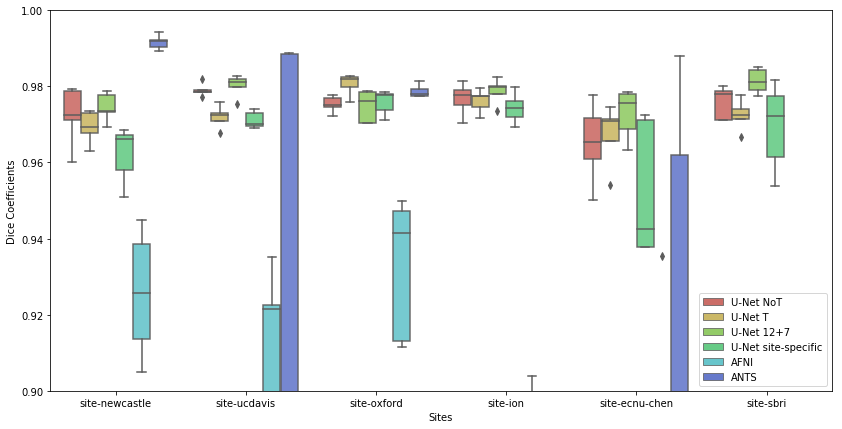

In [227]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.boxplot(x="Sites",y="Dice Coefficients",hue="Pipelines",data=df,palette=sns.color_palette("hls", 8),boxprops=dict(alpha=0.9))
# ax = sns.swarmplot(x="Sites",y="Dice Coefficients",hue="Pipelines",data=df,color=".2")
ax.set_ylim(0.9,1)
ax.legend(loc=4)

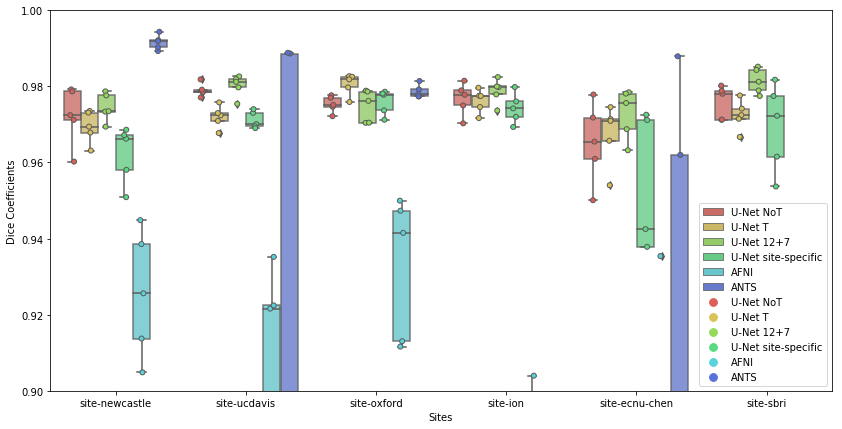

In [237]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.boxplot(x="Sites",y="Dice Coefficients",hue="Pipelines",data=df,palette=sns.color_palette("hls", 8),boxprops=dict(alpha=0.8))
ax=sns.stripplot(x="Sites",y="Dice Coefficients",data=df,jitter=True,dodge=True, marker='o',hue='Pipelines',palette=sns.color_palette("hls", 8),linewidth=1)
ax.set_ylim(0.9,1)
ax.legend(loc=4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_box_strip.png')

In [210]:
data = []
model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific','AFNI','ANTS','Free Surfer','FSL']
site_list = ['site-newcastle', 'site-ucdavis', 'site-oxford', 'site-ion', 'site-ecnu-chen', 'site-sbri']

for i,site in enumerate(site_list):
    for j,pipeline in enumerate(model):
        for k in range(5):
            row = [site, pipeline, k, dice[j,i*5+k]]
            # print(row)
            data.append(row)
        
df = pd.DataFrame(data=data, columns=['Sites', 'Pipelines', 'Sub', 'Dice Coefficients'])

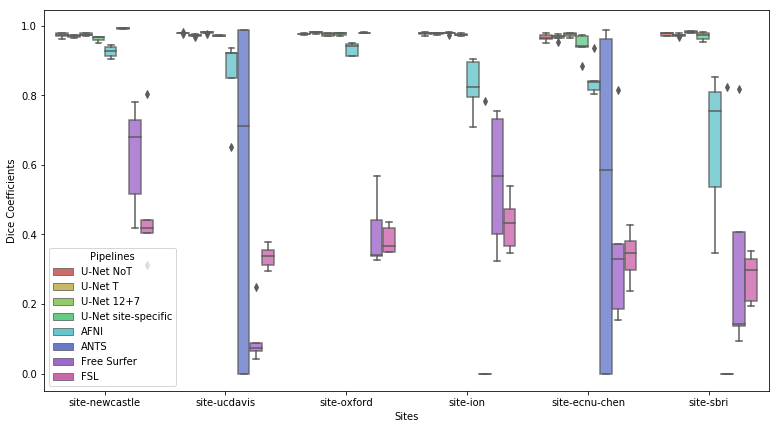

In [214]:
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.boxplot(x="Sites",y="Dice Coefficients",hue="Pipelines",data=df,palette=sns.color_palette("hls", 8),boxprops=dict(alpha=0.8))
# ax = sns.swarmplot(x="Sites",y="Dice Coefficients",hue="Pipelines",color='dimgray',data=df)
# plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_site.png')

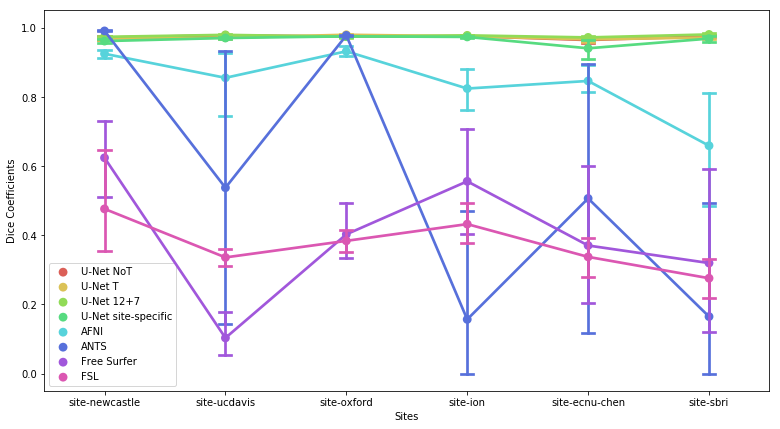

In [172]:
#######################
#   Dice Point Plot   #
#######################
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.pointplot(x="Sites", y="Dice Coefficients", hue="Pipelines", data=df, capsize=.1, palette=sns.color_palette("hls", 8))
ax.legend(loc=3)
# plt.xticks(rotation=20)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_point.png')

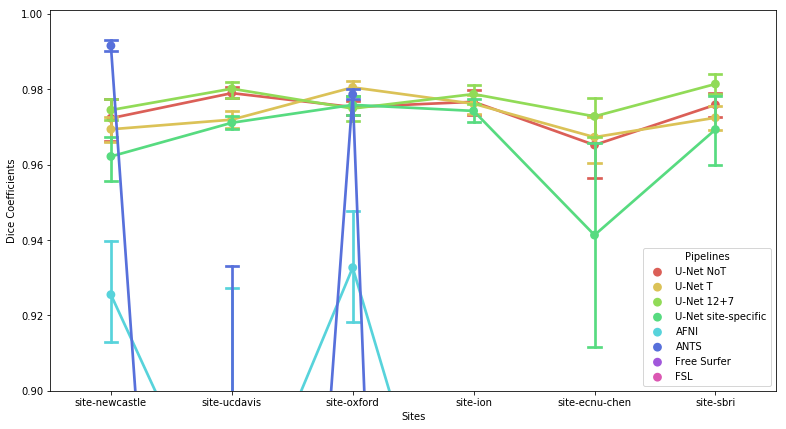

In [173]:
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.pointplot(x="Sites", y="Dice Coefficients", hue="Pipelines", data=df, capsize=.1, palette=sns.color_palette("hls", 8))
# ax.legend(loc=3)
ax.set_ylim(0.9,1.001)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_point_up.png')

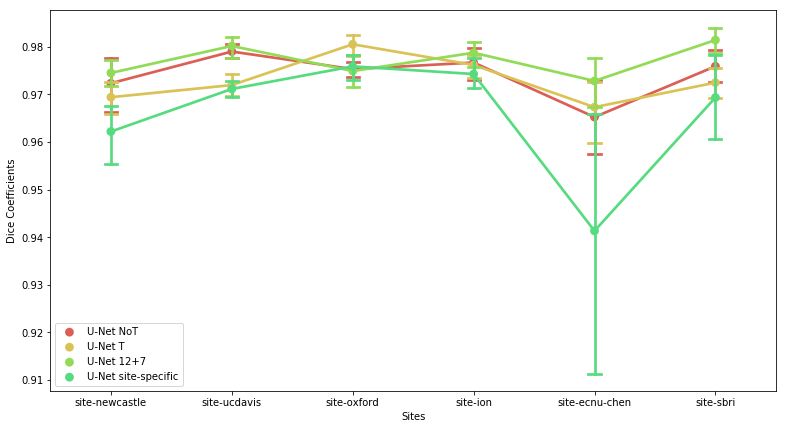

In [239]:
data = []
model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific']
site_list = ['site-newcastle', 'site-ucdavis', 'site-oxford', 'site-ion', 'site-ecnu-chen', 'site-sbri']

for i,site in enumerate(site_list):
    for j,pipeline in enumerate(model):
        for k in range(5):
            row = [site, pipeline, k, dice[j,i*5+k]]
            # print(row)
            data.append(row)
        
df = pd.DataFrame(data=data, columns=['Sites', 'Pipelines', 'Sub', 'Dice Coefficients'])

fig, ax = plt.subplots(figsize=(13,7))
ax = sns.pointplot(x="Sites", y="Dice Coefficients", hue="Pipelines", data=df, capsize=.1, palette=sns.color_palette("hls", 8))
ax.legend(loc=3)
# plt.xticks(rotation=20)
# plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_point_unet.png')

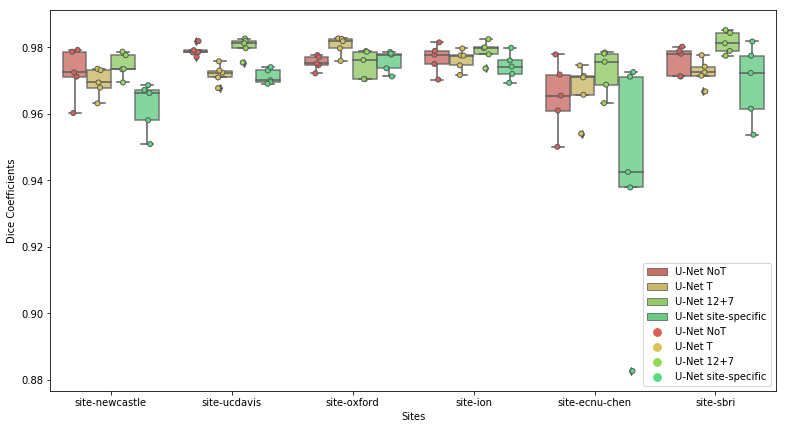

In [245]:
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.boxplot(x="Sites", y="Dice Coefficients", hue="Pipelines", data=df, dodge=True, palette=sns.color_palette("hls", 8),boxprops=dict(alpha=0.8))
ax=sns.stripplot(x="Sites",y="Dice Coefficients",data=df,jitter=True,dodge=True,marker='o',hue='Pipelines',palette=sns.color_palette("hls", 8),linewidth=1)
ax.legend(loc=4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_site_unet.png')

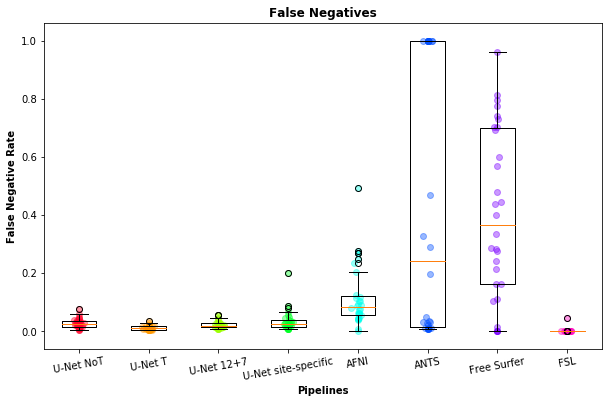

In [176]:
####################
#   FNR Box Plot   #
####################

model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific','AFNI','ANTS','Free Surfer','FSL']
fn = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/FN.mat')
fn = fn['FN']
tp = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/TP.mat')
tp = tp['TP']
specificity = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/specificity.mat')
specificity = specificity['specificity']


xs, fprs, fnrs = [], [], []

for i,m in enumerate(model):
    xs.append(np.concatenate((np.ones(5)*(i+1), np.random.normal(i+1, 0.04, 20), np.ones(5)*(i+1)), axis=0))
    fnr = fn[i,:]/(fn[i,:]+tp[i,:])
    n = fnr.tolist()
    n.sort()
    fnrs.append(n)
    fpr = 1-specificity[i,:]
    p = fpr.tolist()
    p.sort()
    fprs.append(p)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('False Negatives',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('False Negative Rate',fontweight='bold')
ax.boxplot(np.transpose(np.array(fnrs)), labels=model)
plt.xticks(rotation=10)

clevels = np.linspace(0., 1., len(model))
for x, y, clevel in zip(xs, fnrs, clevels):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/fn.png')

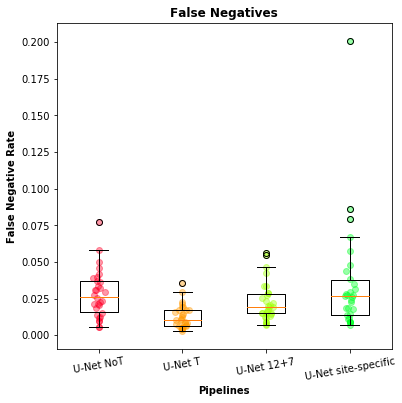

In [177]:
###########################
#   FNR Box Plot Zoom-in  #
###########################

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('False Negatives',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('False Negative Rate',fontweight='bold')
ax.boxplot(np.transpose(np.array(fnrs)[0:4,:]), labels=['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific'])
plt.xticks(rotation=10)

for x, y, clevel in zip(xs[0:4], fnrs[0:4], clevels[0:4]):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/fn_unet.png')

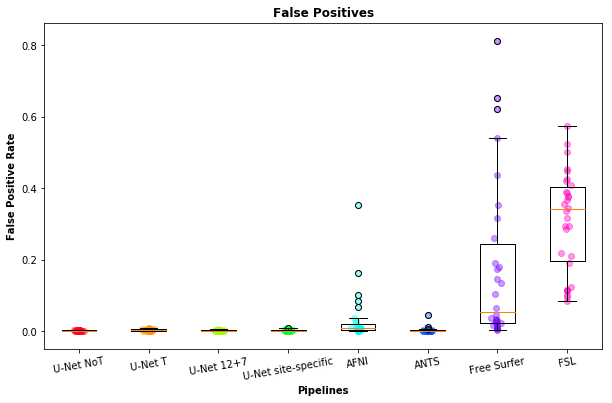

In [180]:
####################
#   FPR Box Plot   #
####################

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('False Positives',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('False Positive Rate',fontweight='bold')
ax.boxplot(np.transpose(np.array(fprs)), labels=model)
plt.xticks(rotation=10)
clevels = np.linspace(0., 1., len(model))
for x, y, clevel in zip(xs, fprs, clevels):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/fp.png')

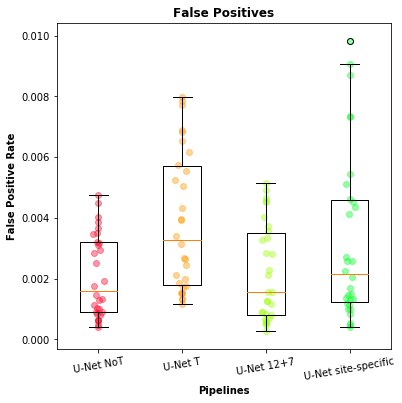

In [181]:
###########################
#   FPR Box Plot Zoom-in  #
###########################

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('False Positives',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('False Positive Rate',fontweight='bold')
ax.boxplot(np.transpose(np.array(fprs)[0:4,:]), labels=['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific'])
plt.xticks(rotation=10)
for x, y, clevel in zip(xs[0:4], fprs[0:4], clevels[0:4]):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/fp_unet.png')

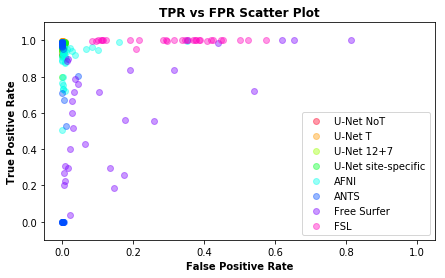

In [182]:
#########
#  ROC  #
#########

# x: FPR, y: TPR
model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific','AFNI','ANTS','Free Surfer','FSL']
sensitivity = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/sensitivity.mat')
sensitivity = sensitivity['sensitivity']
specificity = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/specificity.mat')
specificity = specificity['specificity']

fig, ax = plt.subplots(figsize=(7,4))
for i,m in enumerate(model):
    tpr = sensitivity[i,:]
    fpr = 1-specificity[i,:]
    ax.scatter(fpr, tpr, c=cm.gist_rainbow(clevels[i]), alpha=0.4, label=m)
ax.legend(loc=4)
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.1,1.1)
ax.set_title('TPR vs FPR Scatter Plot',fontweight='bold')
ax.set_xlabel('False Positive Rate',fontweight='bold')
ax.set_ylabel('True Positive Rate',fontweight='bold')
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/roc.png')

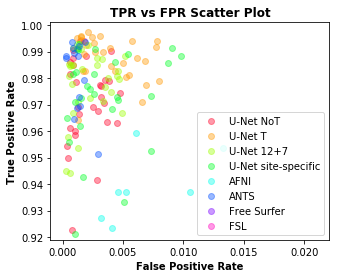

In [183]:
##################
#  ROC  Zoom-in  #
##################

fig, ax = plt.subplots(figsize=(5,4))
for i,m in enumerate(model):
    tpr = sensitivity[i,:]
    fpr = 1-specificity[i,:]
    ax.scatter(fpr, tpr, c=cm.gist_rainbow(clevels[i]), alpha=0.4, label=m)
ax.legend(loc=4)
ax.set_xlim(-0.001,0.0221)
ax.set_ylim(0.919,1.001)
ax.set_title('TPR vs FPR Scatter Plot',fontweight='bold')
ax.set_xlabel('False Positive Rate',fontweight='bold')
ax.set_ylabel('True Positive Rate',fontweight='bold')
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/roc_upperleft.png')

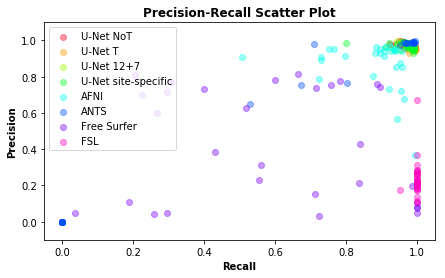

In [186]:
######################
#  Precision-Recall  #
######################

# the precision (y-axis) and the recall (x-axis)

model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific','AFNI','ANTS','Free Surfer','FSL']
sensitivity = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/sensitivity.mat')
sensitivity = sensitivity['sensitivity']
precision = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/precision.mat')
precision = precision['precision']

fig, ax = plt.subplots(figsize=(7,4))
for i,m in enumerate(model):
    recall = sensitivity[i,:]
    prec = precision[i,:]
    ax.scatter(recall, prec, c=cm.gist_rainbow(clevels[i]), alpha=0.4, label=m)
ax.legend(loc=2)
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.1,1.1)
ax.set_title('Precision-Recall Scatter Plot',fontweight='bold')
ax.set_xlabel('Recall',fontweight='bold')
ax.set_ylabel('Precision',fontweight='bold')
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/precision-recall.png')

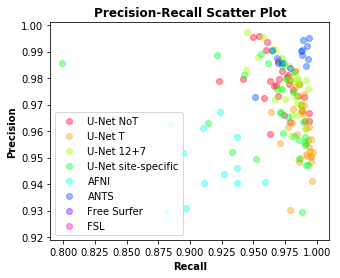

In [189]:
##############################
#  Precision-Recall Zoom-in  #
##############################

fig, ax = plt.subplots(figsize=(5,4))
for i,m in enumerate(model):
    recall = sensitivity[i,:]
    prec = precision[i,:]
    ax.scatter(recall, prec, c=cm.gist_rainbow(clevels[i]), alpha=0.4, label=m)
ax.legend(loc=3)
ax.set_xlim(0.79,1.01)
ax.set_ylim(0.919,1.001)
ax.set_title('Precision-Recall Scatter Plot',fontweight='bold')
ax.set_xlabel('Recall',fontweight='bold')
ax.set_ylabel('Precision',fontweight='bold')
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/precision-recall_upperright.png')

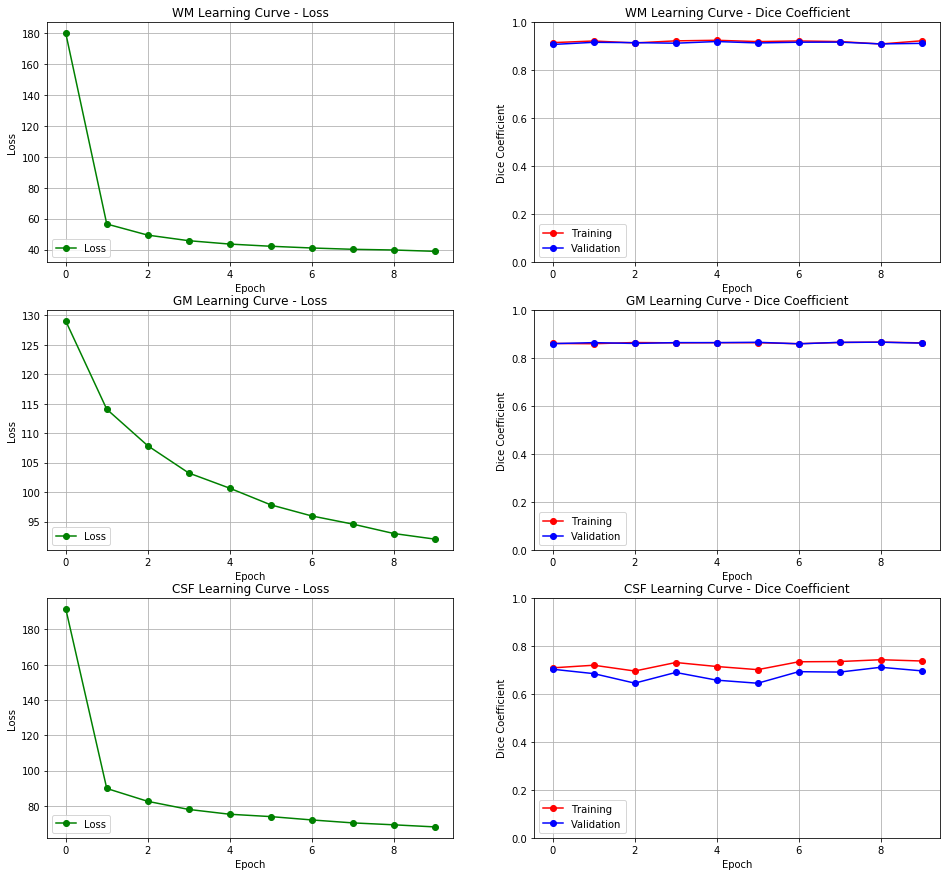

In [121]:
"""
Plot learning curves - dice and loss 
"""

file_path = ['/Users/xinhui.li/Documents/research/data/out/aws/hcp/wm/DiceAndLoss.pkl',
              '/Users/xinhui.li/Documents/research/data/out/aws/hcp/gm/DiceAndLoss.pkl',
              '/Users/xinhui.li/Documents/research/data/out/aws/hcp/csf/DiceAndLoss.pkl']

# ['/Users/xinhui.li/Documents/research/data/out/aws/monkey/wm/DiceAndLoss.pkl',
            # '/Users/xinhui.li/Documents/research/data/out/aws/monkey/gm/DiceAndLoss.pkl',
            # '/Users/xinhui.li/Documents/research/data/out/aws/monkey/csf/DiceAndLoss.pkl']

dice_loss = pickle.load(open(file_path[0], "rb"), encoding="latin1")

loss = []
dice_train = []
dice_val = []

for i in file_path:
    dice_loss = pickle.load(open(i, "rb"), encoding="latin1")
    loss.append(dice_loss[1])
    dice_train.append([x[0] for x in dice_loss[0]]) # check with Xindi?
    dice_val.append([x[1] for x in dice_loss[0]])

epoch = range(len(loss[0]))

# Plot learning curve
row = 3
col = 2
legend = ["Training", "Validation"]
label = ["Loss", "Dice Coefficient"]
tissue = ["WM", "GM", "CSF"]

_, axes = plt.subplots(row, col, figsize=(16, 15))

for i in range(row):
    for j in range(col):
        if j == 1:
            axes[i,j].plot(epoch, dice_train[i], 'o-', color="r", label=legend[0])
            axes[i,j].plot(epoch, dice_val[i], 'o-', color="b", label=legend[1])
            axes[i,j].set_ylim(0,1)
        else:
            axes[i,j].plot(epoch, loss[i], 'o-', color="g", label=label[j])
        axes[i,j].set_title(tissue[i]+" Learning Curve - "+label[j])
        axes[i,j].set_ylabel(label[j])
        axes[i,j].grid()
        axes[i,j].legend(loc="lower left")
        axes[i,j].set_xlabel("Epoch")


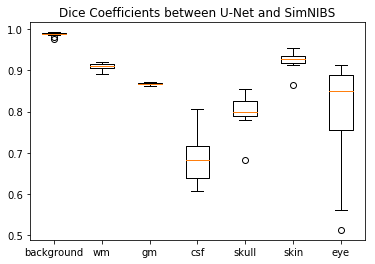

In [70]:
"""
Plot dice coefficients of tissue masks between U-Net and SimNIBS
"""

tissue = ['background','wm','gm','csf','skull','skin','eye']
dice = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/data/out/colab/HBN_test_hnu_hbn_preT1/dice.mat')
dice = dice['dice']

fig, ax = plt.subplots()
ax.set_title('Dice Coefficients between U-Net and SimNIBS')
ax.boxplot(np.transpose(dice), labels=tissue)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/data/out/colab/HBN_test_hnu_hbn_preT1/dice.png')
plt.show()

In [13]:
dataset = ['HCP']*15 + ['HCP+HBN']*15

dice = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/data/out/colab/hbn_test_hnu_train_pT1/dice.mat')
dice = dice['dice']
dice = np.transpose(dice)

dice_hbn = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/data/out/colab/hbn_test_hnu_hbn_train_pT1/dice.mat')
dice_hbn = dice_hbn['dice']
dice_hbn = np.transpose(dice_hbn)

dice_group = np.vstack((dice, dice_hbn))

In [77]:
data = []
for i,j in enumerate(dice_group.tolist()):
    for k,l in enumerate(j): 
        row = [l, tissue[k], dataset[i]]
        data.append(row)
        
df = pd.DataFrame(data=data, columns=['dice', 'tissue', 'dataset'])

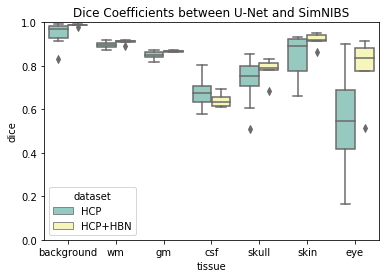

In [78]:
ax = sns.boxplot(x="tissue", y="dice", hue="dataset",
                 data=df, palette="Set3")
ax.set_ylim([0,1])
ax.set_title('Dice Coefficients between U-Net and SimNIBS')
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/data/out/colab/figures/HBN_pT1_dice.png')

In [ ]:
# Monkey Skullstripping

############
#   Dice   #
############

model = ['WM','GM','CSF']
dice = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/data/monkey/site-mountsinai-P/dice_seg_unet.mat')
dice = dice['dice']

xs, ys = [], []

for i, m in enumerate(model):
    xs.append(np.concatenate((np.ones(5)*(i+1), np.random.normal(i+1, 0.06, 23), np.ones(2)*(i+1)), axis=0))
    d = dice[i,:].tolist()
    d.sort()
    ys.append(d)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Dice Coefficients between Pipeline Outputs and Ground Truths',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('Dice Coefficients',fontweight='bold')
ax.boxplot(np.transpose(dice), labels=model)
plt.xticks(rotation=10)

clevels = np.linspace(0., 1., len(model))
for x, y, clevel in zip(xs, ys, clevels):
    # ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.6, s=8)
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/data/monkey/site-mountsinai-P/dice.png')